<a href="https://colab.research.google.com/github/MouniriOuma/TAR-K-Means-Clustering-on-Customer-Spending-Dataset/blob/main/TAR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def charger_dataset(file):
    return pd.read_csv(file)

# Charger le fichier de données
df = charger_dataset('spending_score_predict.csv')

In [ ]:
def pretraitement_data(df):
    # Sélectionner les colonnes pertinentes
    selected_columns = ['Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
    data = df[selected_columns]

    # Convertir la colonne Gender en valeurs numériques (par exemple, 0 pour M et 1 pour F)
    data.loc[:, 'Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    # Normaliser les données
    scaler = StandardScaler()
    data_normalized = scaler.fit_transform(data)

    return data_normalized

# Prétraitement des données
data_normalized = pretraitement_data(df)

In [ ]:
def application_kmeans(data, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=1000, random_state=42)
    kmeans.fit(data)

    return kmeans, kmeans.labels_

# Apply K-Means
kmeans, labels = application_kmeans(data_normalized, n_clusters=4)

# Add the cluster labels to the original DataFrame
df['Cluster'] = labels

C:\Users\Mouma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


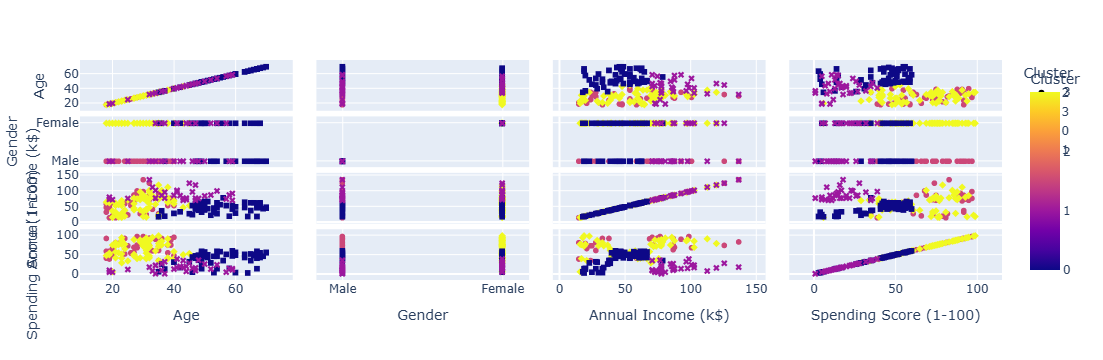

In [ ]:
def visualize_clusters(df):
    fig = px.scatter_matrix(df, dimensions=['Age','Gender', 'Annual Income (k$)', 'Spending Score (1-100)'],
                            color='Cluster', symbol='Cluster')
    fig.show()

# Visualize clusters
visualize_clusters(df)

C:\Users\Mouma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Mouma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Mouma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\Mouma\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

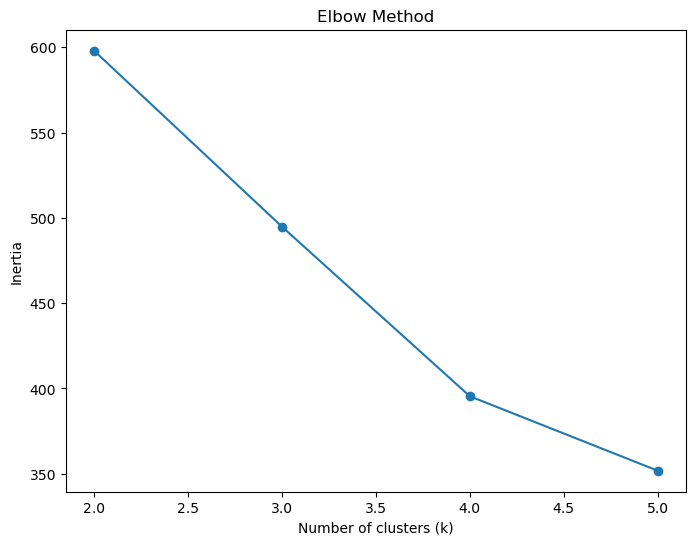

In [ ]:
def evaluation_clustering(data):
    inertias = []
    cluster_range = range(2, 6)

    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Visualize the elbow method
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertias, marker='o')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title("Elbow Method")
    plt.show()

# Evaluate clustering quality
evaluation_clustering(data_normalized)